<center><h1><b>7주차 ✅ Insurance Premium ML 1차</b></h1></center>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

In [7]:
raw = pd.read_csv('data/insurance/insurance.csv')
raw.shape

(1338, 7)

In [8]:
raw.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
raw['children'] = raw['children'].astype('object')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


----

In [5]:
# train, test 나누고 -> 한꺼번에 있으니까 아직
# one-hot encoding 필요
# 이상치가 있던 값이 뭐였지? charges
# 근데 charges는 결과 colums인데
# 그러면 log를 취해야하는 건가?

In [11]:
feature_namse = [
    'age', 'sex', 'bmi',
    'children', 'smoker', 'region',
]
feature_namse

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [12]:
label_name = 'charges'
label_name

'charges'

----

In [13]:
X = raw[feature_namse]
X.shape

(1338, 6)

In [14]:
y = raw[label_name]
y.shape

(1338,)

In [15]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [16]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [17]:
X_ohe = pd.get_dummies(X)
X_ohe.head()

/Users/yeomss/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,1,0,1,0,0,0,0,0,0,1,0,0,0,1
1,18,33.770,0,1,0,1,0,0,0,0,1,0,0,0,1,0
2,28,33.000,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3,33,22.705,0,1,1,0,0,0,0,0,1,0,0,1,0,0
4,32,28.880,0,1,1,0,0,0,0,0,1,0,0,1,0,0


In [22]:
X_ohe.isnull().sum()

age                 0
bmi                 0
sex_female          0
sex_male            0
children_0          0
children_1          0
children_2          0
children_3          0
children_4          0
children_5          0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

----

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_ohe, y, test_size=0.2, random_state=42,
)

In [26]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)


(1070, 16)

(268, 16)

(1070,)

(268,)

----

In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model

RandomForestRegressor(random_state=42)

In [38]:
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
model.feature_importances_

array([1.32398610e-01, 2.09921329e-01, 4.04609346e-03, 4.25217604e-03,
       6.65394029e-03, 5.14131402e-03, 4.27674475e-03, 2.24787198e-03,
       4.59191589e-03, 3.53136784e-04, 4.32686195e-01, 1.75932166e-01,
       6.29339400e-03, 4.21722239e-03, 4.03205058e-03, 2.95583895e-03])

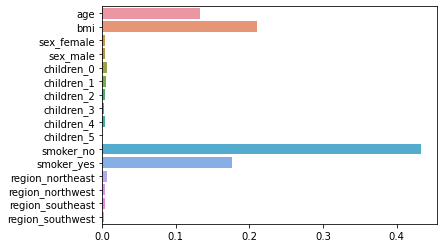

In [43]:
_ = sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

In [39]:
y_predict = model.predict(X_test)
y_predict[:5]

array([10074.9024005,  5132.3665045, 28157.433153 , 12131.3350353,
       34685.1067227])

-----

In [49]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_predict)
mse

21528405.597807065

In [48]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predict)

2561.444598906934

In [50]:
# rmse
mse ** 0.5

4639.871291082013

In [51]:
from sklearn.metrics import mean_squared_log_error

rmsle = mean_squared_log_error(y_test, y_predict)**0.5
rmsle


0.44134676307002046